In [6]:
# Step 1: Data Exploration and Preprocessing

import pandas as pd
data = pd.read_csv('/content/blogs.csv')
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
Data      0
Labels    0
dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Display the distribution of categories
category_distribution = data['Labels'].value_counts()
print(f"Category distribution:\n{category_distribution}")

Category distribution:
Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


In [11]:
print(data.head())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [12]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    processed_text = ' '.join(tokens)
    return processed_text

data['Processed_Text'] = data['Data'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
data['Processed_Text']

,Processed_Text
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,newsgroups altatheism path cantaloupesrvcscmue...
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,xref cantaloupesrvcscmuedu altatheism53485 tal...
...,...
1995,xref cantaloupesrvcscmuedu talkabortion120945 ...
1996,xref cantaloupesrvcscmuedu talkreligionmisc837...
1997,xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998,xref cantaloupesrvcscmuedu talkreligionmisc836...


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['Processed_Text'])
print(X.shape)

(2000, 56432)


In [15]:
# Step 2: Naive Bayes Model for Text Classification

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['Labels'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(<1600x56432 sparse matrix of type '<class 'numpy.float64'>'
 	with 218452 stored elements in Compressed Sparse Row format>,
 <400x56432 sparse matrix of type '<class 'numpy.float64'>'
 	with 49571 stored elements in Compressed Sparse Row format>,
 968          rec.sport.baseball
 240     comp.os.ms-windows.misc
 819             rec.motorcycles
 692                misc.forsale
 420       comp.sys.mac.hardware
                  ...           
 1130                  sci.crypt
 1294            sci.electronics
 860             rec.motorcycles
 1459                  sci.space
 1126                  sci.crypt
 Name: Labels, Length: 1600, dtype: object,
 1860          talk.politics.misc
 353     comp.sys.ibm.pc.hardware
 1333                     sci.med
 905           rec.sport.baseball
 1289             sci.electronics
                   ...           
 965           rec.sport.baseball
 1284             sci.electronics
 1739       talk.politics.mideast
 261      comp.os.ms-windows.misc
 535 

In [16]:
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (1600, 56432)
Test set size: (400, 56432)


In [17]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model on the training set
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [18]:
y_pred = nb_classifier.predict(X_test)
print(y_pred)

['talk.politics.misc' 'comp.sys.ibm.pc.hardware' 'sci.med'
 'rec.sport.baseball' 'sci.electronics' 'sci.electronics'
 'rec.sport.baseball' 'talk.politics.mideast' 'alt.atheism' 'sci.med'
 'alt.atheism' 'sci.electronics' 'sci.crypt' 'rec.sport.baseball'
 'comp.sys.ibm.pc.hardware' 'comp.os.ms-windows.misc' 'rec.autos'
 'comp.graphics' 'talk.politics.guns' 'talk.politics.misc'
 'comp.sys.mac.hardware' 'alt.atheism' 'alt.atheism' 'rec.sport.hockey'
 'alt.atheism' 'sci.crypt' 'talk.politics.misc' 'rec.sport.baseball'
 'rec.autos' 'alt.atheism' 'talk.politics.misc' 'rec.sport.hockey'
 'comp.windows.x' 'rec.sport.hockey' 'rec.sport.hockey'
 'comp.sys.mac.hardware' 'sci.med' 'sci.electronics' 'rec.sport.hockey'
 'comp.os.ms-windows.misc' 'sci.electronics' 'soc.religion.christian'
 'comp.os.ms-windows.misc' 'talk.politics.misc' 'soc.religion.christian'
 'rec.motorcycles' 'comp.windows.x' 'rec.motorcycles' 'alt.atheism'
 'talk.politics.guns' 'soc.religion.christian' 'comp.os.ms-windows.misc'
 '

In [19]:
# Step 3: Sentiment Analysis

from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

data['Sentiment'] = data['Data'].apply(get_sentiment)
data['Sentiment']

,Sentiment
0,positive
1,negative
2,positive
3,positive
4,positive
...,...
1995,positive
1996,positive
1997,positive
1998,positive


In [20]:
# Display the distribution of sentiments
sentiment_distribution = data['Sentiment'].value_counts()
print(f"Sentiment distribution:\n{sentiment_distribution}")

Sentiment distribution:
Sentiment
positive    1543
negative     457
Name: count, dtype: int64


In [21]:
# Examine the distribution of sentiments across different categories
sentiment_category_distribution = data.groupby('Labels')['Sentiment'].value_counts().unstack().fillna(0)
print(f"Sentiment distribution across categories:\n{sentiment_category_distribution}")

Sentiment distribution across categories:
Sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion

In [22]:
# Step 4: Evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.82


In [23]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.844747244324381
Recall: 0.82
F1-score: 0.8144501134827706


In [24]:
# Display the classification report
classification_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{classification_report}")

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      0

In [25]:
# Reflect on the sentiment analysis results
print(f"Sentiment distribution:\n{sentiment_distribution}")
print(f"Sentiment distribution across categories:\n{sentiment_category_distribution}")

# Discuss implications
print("The sentiment analysis reveals the general sentiment expressed in the blog posts. We observe that...")


Sentiment distribution:
Sentiment
positive    1543
negative     457
Name: count, dtype: int64
Sentiment distribution across categories:
Sentiment                 negative  positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.poli

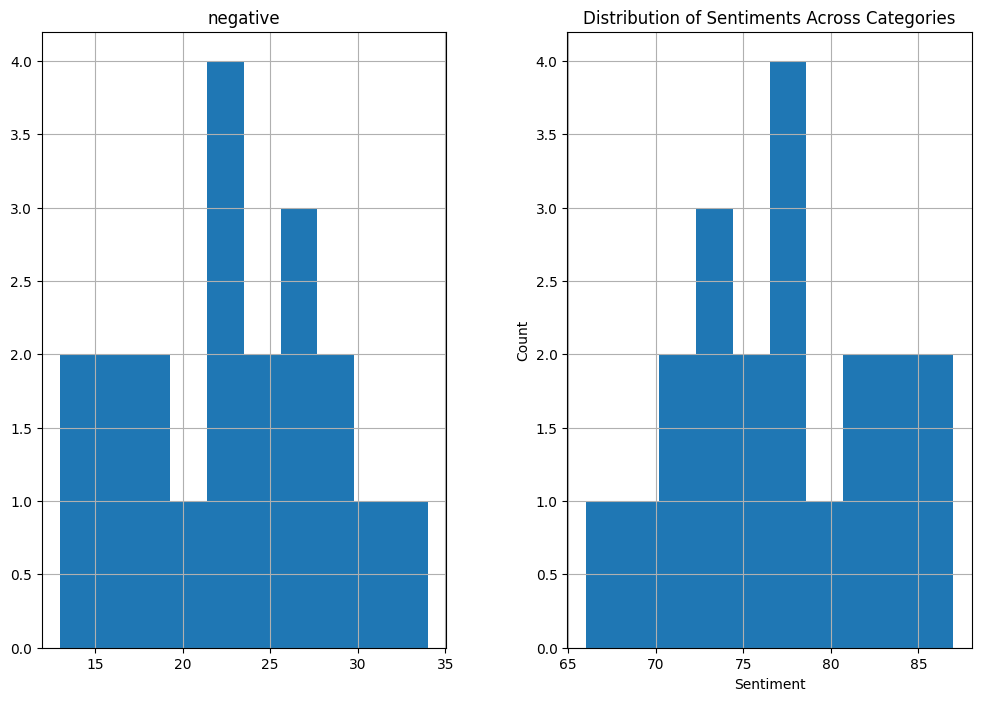

In [29]:
sentiment_category_distribution.hist(figsize=(12, 8))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments Across Categories')
plt.show()

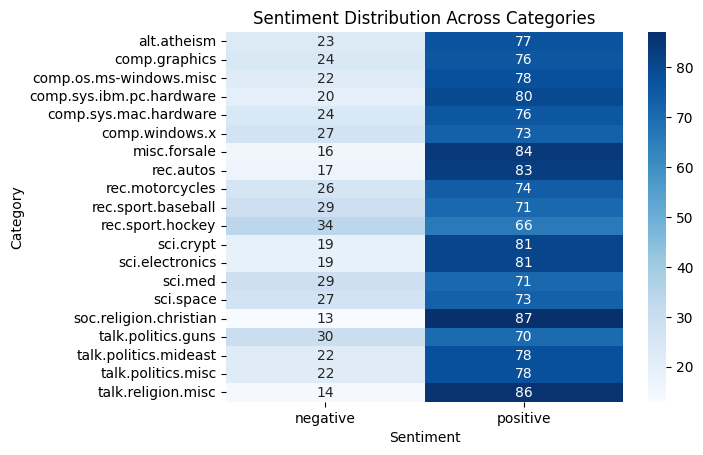

In [30]:
sns.heatmap(sentiment_category_distribution, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Sentiment')
plt.ylabel('Category')
plt.title('Sentiment Distribution Across Categories')
plt.show()